In [1]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-

import sys
import argparse

import math
import pylab
from matplotlib import mlab
import numpy as np
import pprint


In [2]:
a = [-2.0, -1.0, 0.0, 1.0]
b = [math.exp(t) for t in a]
xz = 0.5
print('x - y')
for i in range(len(a)):
    print(str(a[i])+' - '+str(b[i]))

x - y
-2.0 - 0.1353352832366127
-1.0 - 0.36787944117144233
0.0 - 1.0
1.0 - 2.718281828459045


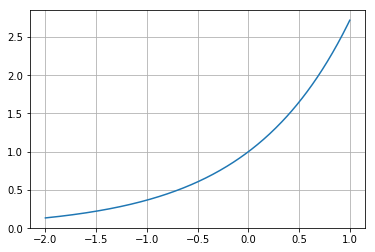

In [3]:
xmin = -2.0
xmax = 1.0

dx = 0.01
xlist = mlab.frange(xmin, xmax, dx)

ylist = [math.exp(x) for x in xlist]

pylab.plot(xlist, ylist)
pylab.grid(True)
pylab.show()

### Lagrange

In [12]:
def lagr(a, b, n, x):
    r = 0
    for i in range(n):
        g = 1
        for k in range(n):
            if i != k:
                g *= (x-a[k]) / (a[i] - a[k])
        r += g * b[i]
    return r

def first(a, b, n, x):
    r = 0
    for i in range(n):
        g = 1
        for k in range(n):
            if i != k:
                g *= 1 / (a[i] - a[k])
        r += g * b[i] 
    return r

### Newton

In [5]:
def icf(a, b, n1, n2):
    if n1 == n2:
        return b[n2]
    else:
        return (icf(a, b, n1+1, n2) - icf(a, b, n1, n2-1)) / (a[n2] - a[n1])
    
def inwt(a, b, n, x):
    r = icf(a, b, 0, 0)
    s = 1
    for i in range(n-1):
        s *= (x - a[i])
        r += (s * icf(a, b, 0, i+1))
    return r

### result

In [15]:
readed = float(input())
print('Exp('+str(readed)+') = '+str(math.exp(readed)))
print('Lagr('+str(readed)+') = '+str(lagr(a,b,4,readed)))
print('iNwt('+str(readed)+') = '+str(inwt(a,b,4,readed)))
print('DOP('+str(readed)+') = '+str(first(a,b,4,readed)))

2
Exp(2.0) = 7.38905609893065
Lagr(2.0) = 6.209309795285337
iNwt(2.0) = 6.209309795285337
DOP(2.0) = 0.11443081145612655


### Lagrange

Lagrange graph:


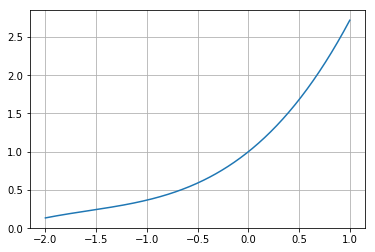

In [8]:
print('Lagrange graph:')
xmin = -2.0
xmax = 1.0

dx = 0.01
xlist = mlab.frange(xmin, xmax, dx)

ylist = [lagr(a, b, 4, x) for x in xlist]

pylab.plot (xlist, ylist)
pylab.grid(True)
pylab.show()

### Newton

Newton graph:


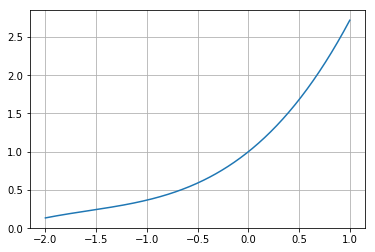

In [9]:
print('Newton graph:')
xmin = -2.0
xmax = 1.0

dx = 0.01
xlist = mlab.frange(xmin, xmax, dx)

ylist = [inwt(a, b, 4, x) for x in xlist]

pylab.plot(xlist, ylist)
pylab.grid(True)
pylab.show()